<a href="https://colab.research.google.com/github/nischay63/Perceptron-Algorithm/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.41832428783346176, 0.6654936605667281, 0.7865410830049593]


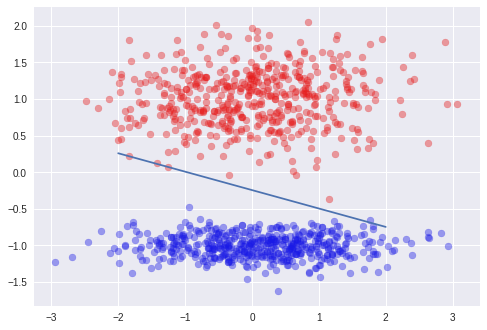

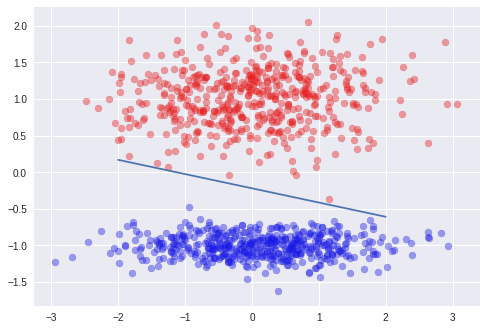

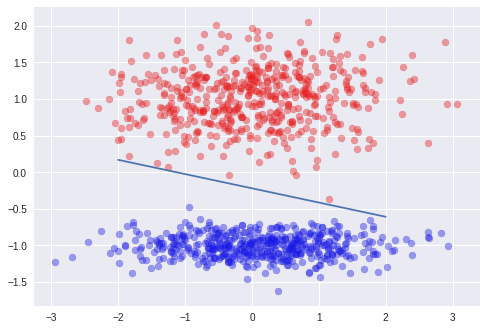

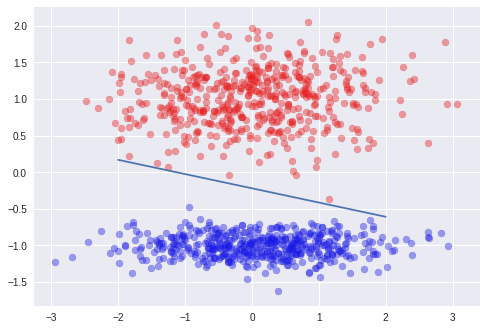

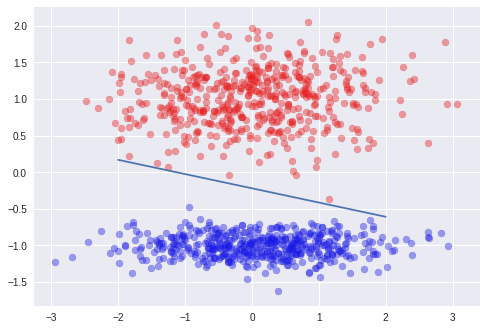

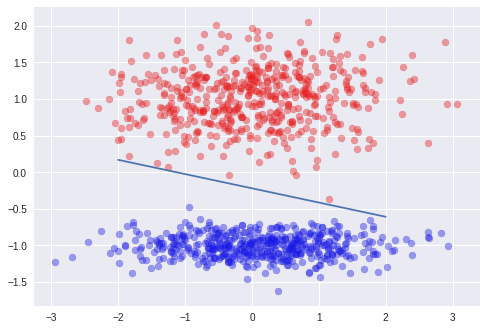

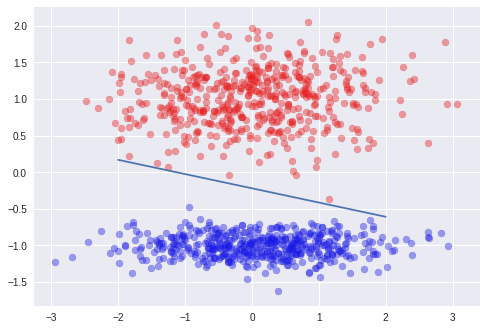

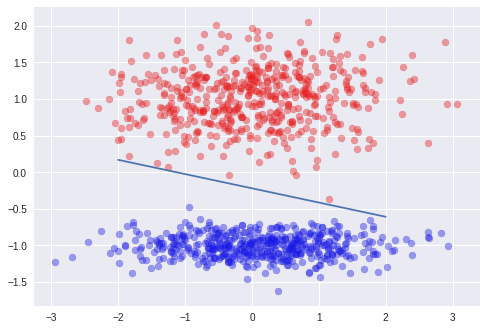

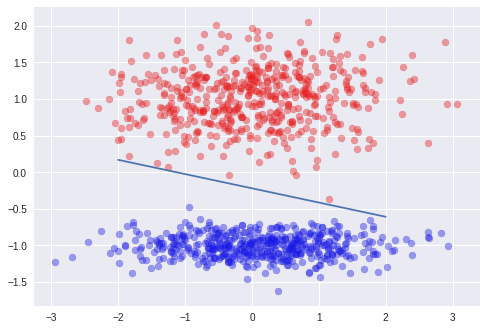

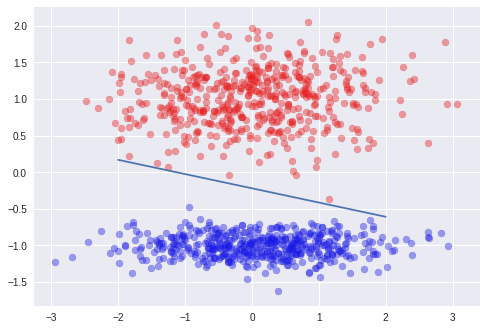

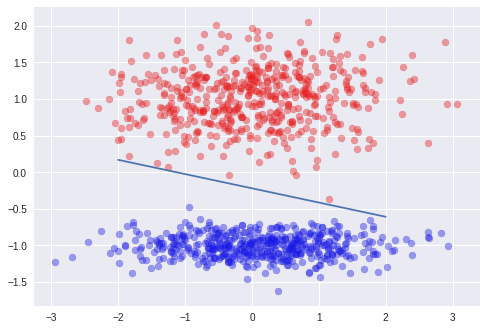

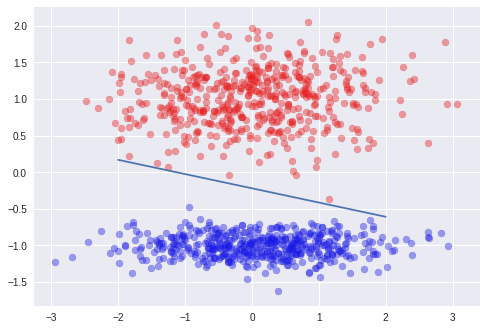

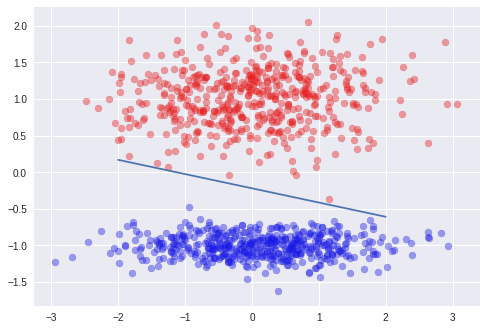

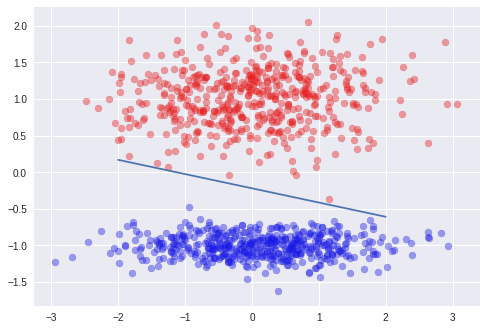

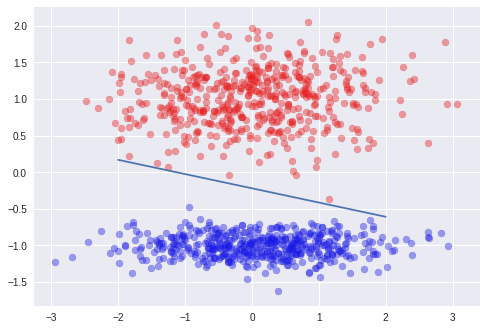

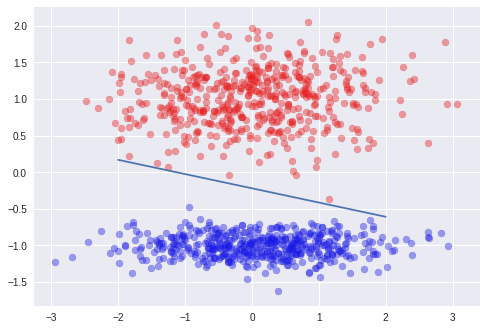

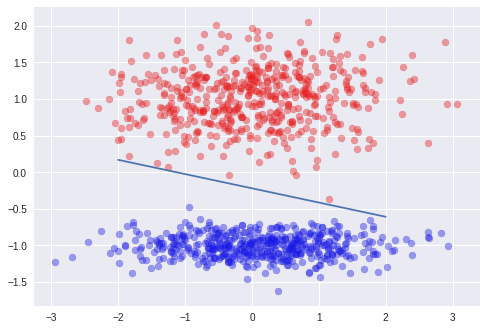

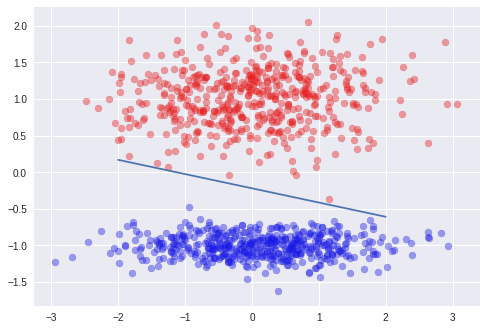

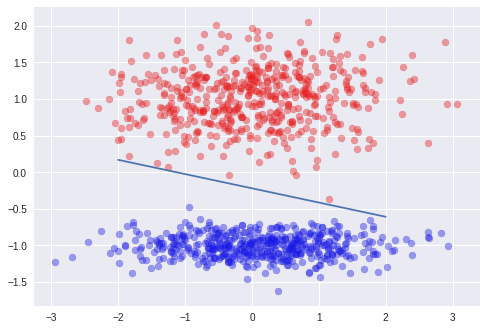

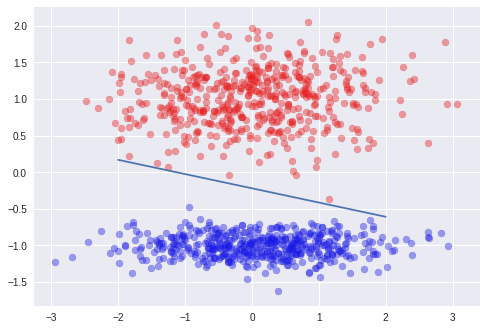

[0.21832428783346158, 0.1937823837688603, 0.9963747071322923]


In [0]:
import csv
from matplotlib import pyplot as plt
import numpy as np
import random
epochs = 10
lr = 0.01

def plot_line_value(weights,x):
  """
  Calculating value of x2 for the decision boundary given x1 and weight values
  """
  return -1*((weights[0]+weights[1]*x)/weights[2])

def get_classwise_data(data):
  c1x1 = list()
  c1x2 = list()
  c2x1 = list()
  c2x2 = list()
  for row in data:
    if row[-1] == 0:
      c1x1.append(row[0])
      c1x2.append(row[1])
    else:
      c2x1.append(row[0])
      c2x2.append(row[1])
  return c1x1,c1x2,c2x1,c2x2
      


def plot_data(weights,data):
  """
  Calculating value of x2 for the decision boundary given x1 and weight values
  
  """
  
  x = [-2,-1,0,1,2]
  y = [plot_line_value(weights,i) for i in x]
  C1X1,C1X2,C2X1,C2X2 = get_classwise_data(data)
  plt.scatter(C1X1,C1X2,color = (0.1,0.1,0.9,0.4))
  plt.scatter(C2X1,C2X2,color = (0.9,0.1,0.1,0.4))
  plt.plot(x,y)
  plt.show()
  
  


def weight_train(train,test):
  """
  Using perceptron convergence theorem to train weights
  
  """
  
  weights = [random.random() for i in range(len(train[0]))]
  print(weights)
  for epoch in range(epochs):
    for row in train:
      prediction = predict(weights,row)
      error = row[-1] - prediction
      weights[0] = weights[0] + lr * error
      for i in range(len(row)-1):
        weights[i + 1] = weights[i + 1] + lr * error * row[i]
    plot_data(weights,test)
  return weights 


def predict(weights,x):
  """
  function to predicting values 
  
  """
  ans = weights[0]
  for i in range(1,len(weights)):
    ans = ans+weights[i]*x[i-1]
  if ans > 0:
    return 1
  else:
    return 0


def load_data():
  """
  Loading data and spliting data into test and train
  
  """
  filename = 'dataset_' 
  rows = [] 
  i=1

  for i in range(3,4):
    with open(filename+str(i)+'.csv', 'r') as csvfile: 
        csvreader = csv.reader(csvfile) 
        for row in csvreader:
            row[1] = float(row[1])
            row[2] = float(row[2])
            row[3] = int(row[3])
            rows.append(row[1:])
  test = rows
  train = rows[:int(0.8*len(rows))]
  return train,test
  
def accuracy(test,weights):
  """
  Function to get accuracy
  
  """
  a = 0
  for i in test:
    ans = predict(weights,i)
    if ans == i[-1]:
      a=a+1
  acc = (a/len(test))*100
#  print(acc)
  
  
def main():
  train,test = load_data()
  weights = weight_train(train,test)
  print(weights)
  accuracy(test,weights)
      
main()

# New Section